# Task 1

# a)

$\textbf{The approximated values from Task 1.2( b.3) );}$
$$$$
AMPA synaspe;
$$ \omega = 320 pA, \quad \tau_{syn} =5 ms$$
$$$$
NMDA synapse;
$$\omega = 260 pA, \quad \tau_{syn} = 50 ms $$
$$$$
GABA$_A$;
$$\omega = -120 pA, \quad \tau_{syn} = 10 ms$$
$$$$
$$$$
GABA$_B$;
$$\omega = -80 pA, \quad \tau_{syn} = 400 ms$$
$$$$
$$$$
$\textbf{The correct values with the multi-exponential model;}$
$$$$
AMPA synaspe;
$$ \omega = 320 pA \quad \tau = [2~~5]ms$$
$$$$
NMDA synapse;
$$\omega = 260 pA, \quad \tau_{rise} = [3~~15]ms \quad \tau_{decay} = [40~~100]ms$$
$$$$
GABA$_A$;
$$\omega = -120 pA, \quad \tau_{rise} = 1 ms \quad \tau_{fast} = 6 ms$$
$$$$
$$$$
GABA$_B$;
$$\omega = -80 pA, \quad \tau_{rise} = [25~~50] ms \quad \tau_{fast} = [100~~300]ms \quad \tau_{slow} = [500~~1000]ms$$

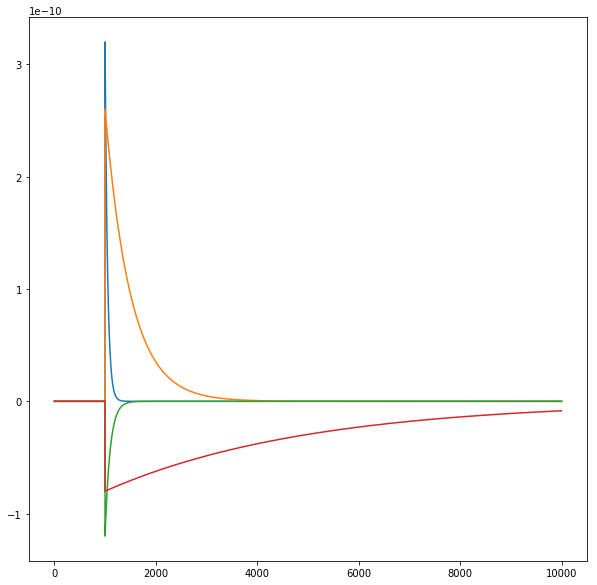

In [160]:
tau = [5e-3,50e-3,10e-3,400e-3]   
W = [320e-12, 260e-12, -120e-12, -80e-12] # II
spiketime = [0.1]                        
#spiketime = [0.1, 0.2, 0.3, 0.4, 0.5]  

I1 = np.zeros(10000)
I2 = np.zeros(10000)
I3 = np.zeros(10000)
I4 = np.zeros(10000)
F = [I1, I2, I3, I4]
t = np.arange(0.0,10000)
dt = (t[2]-t[1])/10000

for k in range(0,4):
    for j in range(0,len(spiketime)):
        for i in range(0,10000):
            dIdt =  -F[k][i-1]/tau[k]
            if spiketime[j]*10000 == i:
                F[k][i] = F[k][i-1] + dIdt*dt + W[k]
            else:
                F[k][i] = F[k][i-1] + dIdt*dt          
# all four plots 
plt.plot(t,I1)
plt.plot(t,I2)
plt.plot(t,I3)
plt.plot(t,I4)

For task 1.2) the differential equation metod is not used, but rather the singel- and multi-exponential models given by the book is used. (Då jag har lagt ner alldeles för mycket tid på Task 1 redan)

# b.1)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

tau = 5e-3
tau_rise = [15e-3, 1e-3, 50e-3]
tau_fast = [6e-3, 200e-3]
tau_slow = [750e-3]
tau_decay = [70e-3]
dt = 1e-4

u_rest = -65e-3
EsynEX = -75e-3
EsynIN = 0
Vsum = [u_rest-EsynEX, u_rest-EsynIN]
gsynS = [320e-12/Vsum[0], 260e-12/Vsum[0], -120e-12/Vsum[0], -80e-12/Vsum[0]]
time = np.arange(0.0,1,1e-4) 
a = 0.8

#spiketime = [0.1]            
spiketime = [0.1, 0.2, 0.3, 0.4, 0.5]      
ampa = np.zeros(len(time))
nmda = np.zeros(len(time))
gabaa = np.zeros(len(time))
gabab = np.zeros(len(time))
gsyn = np.zeros((len(time),len(spiketime)))
ARRS = [ampa,nmda,gabaa,gabab]

x = 0 
def gsynampa(t,f):
    if f <= t:
        x = 1
    else:
        x = 0
    return x*gsynS[0]*np.exp(-(t-f)/tau)
def gsynnmda(t,f):
    if f <= t:
        x = 1
    else:
        x = 0
    return x*gsynS[1]*(1-np.exp(-(t-f)/tau_rise[0]))*np.exp(-(t-f)/tau_decay)
def gsyngabaa(t,f):
    if f <= t:
        x = 1
    else:
        x = 0
    return x*gsynS[2]*(1-np.exp(-(t-f)/tau_rise[1]))*np.exp(-(t-f)/tau_fast[0])
def gsyngabab(t,f):
    if f <= t:
        x = 1
    else:
        x = 0
    return x*gsynS[3]*(1-np.exp(-(t-f)/tau_rise[2]))*(a*np.exp(-(t-f)/tau_fast[1]) + (1-a)*np.exp(-(t-f)/tau_slow))

func = [gsynampa,gsynnmda,gsyngabaa,gsyngabab]
def loops():
    for k in range(0,len(func)):
        for j in range(0,len(spiketime)):
            for i in range(0,10000):
                gsyn[i][j] = func[k](time[i],spiketime[j])
        for i in range(0,10000):
            for j in range(1,len(spiketime)):
                gsyn[i][0] += gsyn[i][j]
            ARRS[k][i] = gsyn[i][0]*Vsum[0]
loops() 

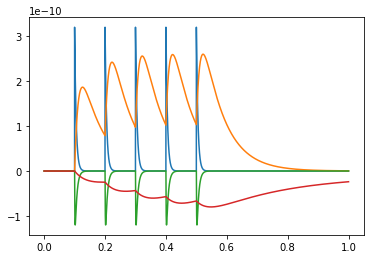

In [4]:
plt.plot(time,ampa*(gsynS[0]*Vsum[0]/max(ampa)))
plt.plot(time,nmda*(gsynS[1]*Vsum[0]/max(nmda)))
plt.plot(time,gabaa*(gsynS[2]*Vsum[0]/min(gabaa)))
plt.plot(time,gabab*(gsynS[3]*Vsum[0]/min(gabab)))

# b.2)

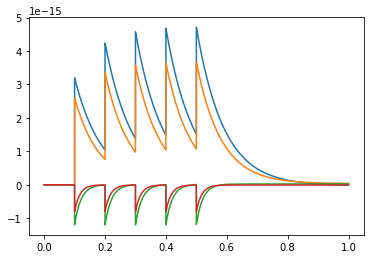

In [91]:
import math as m
tau = [8.95e-2,8.05e-2,2.15e-2,1.75e-2]     # I
#tau = [5e-3,10e-3,50e-3,500e-3]    # II
# tau_ampa = 89.5 ms
# tau_ampa = 80.5 ms
# tau_ampa = 21.5 ms
# tau_ampa = 17.5 ms

gsynS = 40e-12
u_rest = -65e-3
EsynEX = -75e-3
EsynIN = 0
Vsum = [u_rest-EsynEX, u_rest-EsynIN]
#C = [33000000, 326.63, 4.62, 0.368675]    # II
W = [320e-17, 260e-17, -120e-17, -80e-17] # I
#W = [320e-12, 260e-12, -120e-12, -80e-12] # II
#spiketime = [0.1]                        
spiketime = [0.1, 0.2, 0.3, 0.4, 0.5]  

I1 = np.zeros(len(time))
I2 = np.zeros(len(time))
I3 = np.zeros(len(time))
I4 = np.zeros(len(time))
gsyn = np.zeros((len(time),len(spiketime)))
F = [I1, I2, I3, I4]
t = np.arange(0.0,10000)
dt = (t[2]-t[1])/10000

for k in range(0,4):
    for j in range(0,len(spiketime)):
        for i in range(1,10000):
            if spiketime[j]*10000 <= i:
                x = 1
            else:
                x = 0
            if k >= 2:
                y = 1
            else:
                y = 0
            dIdt = -1*x*gsynS*np.exp(-(t[i]/10000-spiketime[j])/tau[k])*Vsum[y]     # II
            #dIdt = -1*x*gsynS*np.exp(-(t[i]/10000-spiketime[j])/tau[k])*Vsum[y]    # I
            if spiketime[j]*10000 == i:
                gsyn[i][j] = gsyn[i-1][j] + dIdt*dt*tau[k] + W[k] #*C[k] # II
            else:
                gsyn[i][j] = gsyn[i-1][j] + dIdt*dt*tau[k]  #II
    for i in range(0,10000):
        for j in range(0,len(spiketime)):
            F[k][i] += gsyn[i][j]

# all four plots 
plt.plot(time,I1)
plt.plot(time,I2)
plt.plot(time,I3)
plt.plot(time,I4)

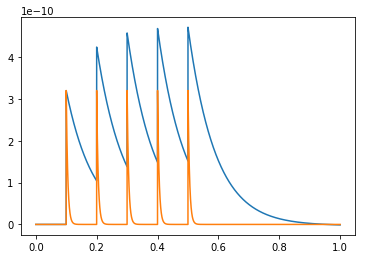

In [92]:
plt.plot(time,I1*10**5)
plt.plot(time,ampa*(320e-12/Vsum[0]*Vsum[0]/max(ampa)))
# Real AMPA simulation vs integrated approximation

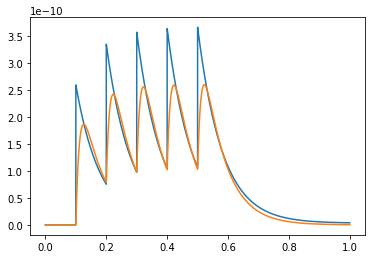

In [93]:
plt.plot(time,I2*10**5)
plt.plot(time,nmda*(260e-12/Vsum[0]*Vsum[0]/max(nmda)))
# Real NMDA simulation vs integrated approximation

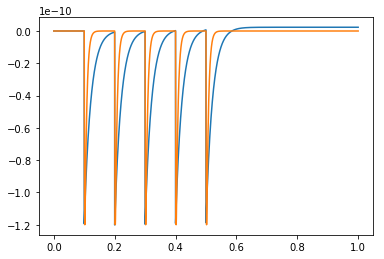

In [44]:
plt.plot(time,I3*10**5)
plt.plot(time,gabaa*(-120e-12/Vsum[0]*Vsum[0]/min(gabaa)))
# Real NMDA simulation vs integrated approximation

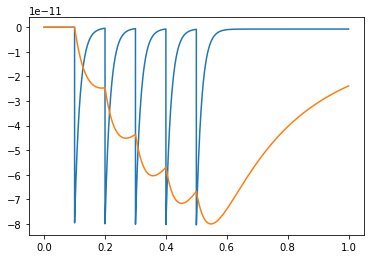

In [45]:
plt.plot(time,I4*10**5)
plt.plot(time,gabab*(-80e-12/Vsum[0]*Vsum[0]/min(gabab)))
# Real NMDA simulation vs integrated approximation

# c) 

In the cell below is the sample code

Text(0, 0.5, 'LIF Hz')

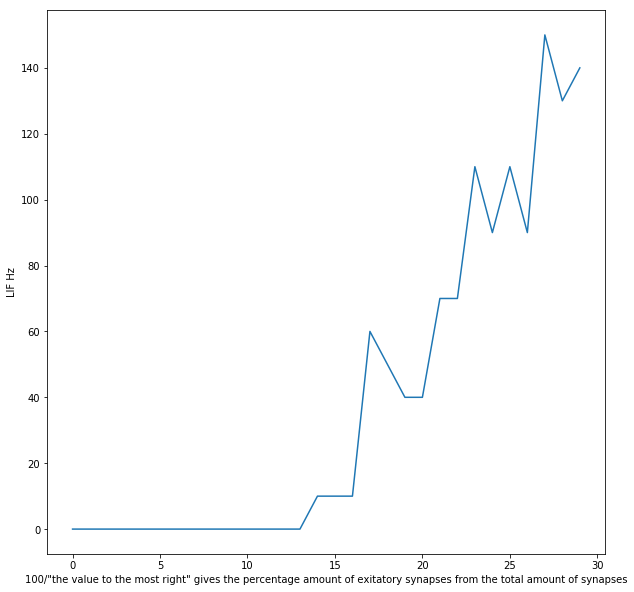

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [10, 10]

def rasterplot(ax, x, y, x_label, y_label):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x, y, marker='|')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
def poisson_neuron(spike_frequency):
    # Random spike generation neuron (Poisson distributed spikes)
    return {
        'type'      : 'poisson',
        'frequency' : spike_frequency          # Average spiking frequency
    }
    
def lif_neuron(num_synapses, E_L=-65e-3, u_reset=-65e-3, u_thres=-50e-3, R=90e6, tau_m=30e-3, tau_syn=50e-3):
    # LIF neuron with dynamic postsynaptic currents
    return {
        'type'    : 'lif',
        'u'       : u_reset,                   # Membrane potential [Volt]
        'E_L'     : E_L,                       # Leakage resting potential [Volt]
        'u_reset' : u_reset,                   # Reset potential after spike [Volt]
        'u_thres' : u_thres,                   # Threshold for spike generation [Volt]
        'R'       : R,                         # Membrane resistance [Ohm]
        'tau_m'   : tau_m,                     # Membrane time constant [second]
        'tau_syn' : tau_syn*np.ones(num_synapses),# Synapse time constant [second] (can also be an array)
        'I_syn'   : np.zeros(num_synapses),    # Postsynaptic currents [Ampere]
        'w_syn'   : np.zeros(num_synapses)     # Synaptic weights [Ampere]
    }

def integrate(dt, t, neurons):
    for n in neurons:
        if n['type'] == 'lif':
            didt = np.divide(-n['I_syn'], n['tau_syn'])
            n['I_syn'] += dt*didt
            dudt = (n['E_L'] - n['u'] + n['R']*sum(n['I_syn'])) / n['tau_m']
            n['u'] += dt*dudt
            
def spikegen(dt, t, neurons):
    spikes = []
    for i,n in enumerate(neurons):
        if n['type'] == 'lif':
            if n['u'] > n['u_thres']:
                n['u'] = n['u_reset']
                spikes.append(i)
        elif n['type'] == 'poisson':
            if np.random.rand() < dt*n['frequency']:
                spikes.append(i)
    return spikes

def update(dt, t, neurons, connections):
    spikes = spikegen(dt, t, neurons)
    for (post, syn, pre) in connections:
        for spike in spikes:
            if spike == pre:
                if neurons[post]['type'] == 'lif':
                    neurons[post]['I_syn'][syn] += neurons[post]['w_syn'][syn]
                else:
                    print('Error: Spike sent to neuron type without synapses')
    integrate(dt, t, neurons)
    return spikes

p = 30
lif = lif_neuron(1000);
z = np.zeros(p)
for j in range(0,p):
    for i in range(0,1000):
        if i < 1000/p*j:
            lif['w_syn'][i] = 300e-12
            lif['tau_syn'][i] = 3e-3
        else:
            lif['w_syn'][i] = 300e-12 * (-1/3)
            lif['tau_syn'][i] = 6e-3

    neurons = [lif]
    connections = []
    for i in range(0,1000):
        neurons.append(poisson_neuron(1))
        connections.append([0,i,i+1])
    t = 0
    dt = 1e-4
    t0 = t
    tv = []
    u1 = []
    u2 = []
    t_spike = []
    n_spike = []

    while t-t0 < 0.1:

        spikes = update(dt, t, neurons, connections)

        # Store membrane potentials needed for plotting/analysis
        tv.append(t)
        u1.append(lif['u'])
        #u2.append(n2['u'])

        # Store spikes needed for plotting/analysis
        if len(spikes)>0:
            for s in spikes:
                t_spike.append(t)
                n_spike.append(s)

        # Timestep completed
        t += dt

    #fig,(ax2,ax3) = plt.subplots(2,1, sharex=True)
    #ax1.plot(tv,u2); ax1.set_ylabel('Membrane potential u2(t)')
    #ax2.plot(tv,u1); ax2.set_ylabel('Membrane potential u1(t)')
    #rasterplot(ax3, t_spike, n_spike,'Time [s]','Neuron index')


    for i in range(0,len(n_spike)):
        if n_spike[i] == 0:
            z[j] += 10

plt.plot(z)
plt.xlabel('100/"the value to the most right" gives the percentage amount of exitatory synapses from the total amount of synapses')
plt.ylabel('LIF Hz')

From the plot above its obvious that the amount of exitatory vs. inhibatory synapses would matter, which the intuition would tell you.

# d) 

Equation 3.7 and 3.8 decsribes the rate of change for the synaptic facilitation and synaptic depression respectively. The synaptic facilitaion represents the 
property in which the biological neuron can enhance the amplitude of the succeeding postsynaptic spike when the neuron has been stimulated to generate multiple spikes in a short duration. The synaptic depression is the straight opposite to facilitation, were succeeding postsynaptic spikes have a diminishing amplitude when stimulated to generate multiple spikes in a short duration.

# Task 2)

21


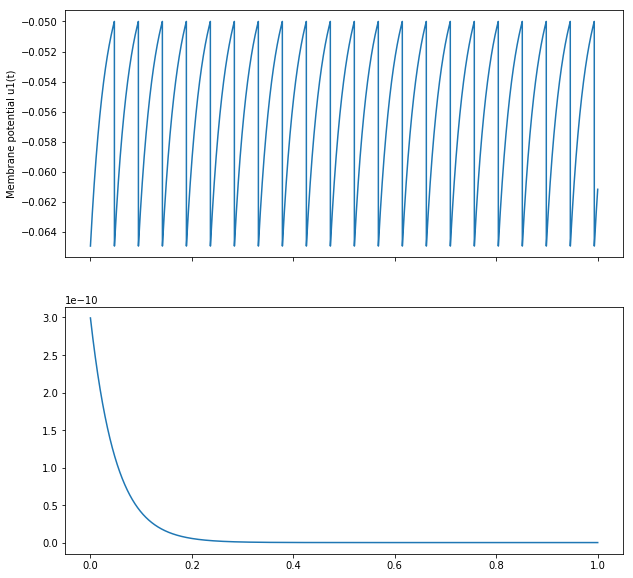

In [161]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [10, 10]

def rasterplot(ax, x, y, x_label, y_label):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x, y, marker='|')
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    
def lif_neuron(num_synapses, E_L=-65e-3, u_reset=-65e-3, u_thres=-50e-3, R=90e6, tau_m=50e-3, tau_syn=[]):
    # LIF neuron with dynamic postsynaptic currents
    return {
        'type'    : 'lif',
        'u'       : u_reset,                   # Membrane potential [Volt]
        'E_L'     : E_L,                       # Leakage resting potential [Volt]
        'u_reset' : u_reset,                   # Reset potential after spike [Volt]
        'u_thres' : u_thres,                   # Threshold for spike generation [Volt]
        'R'       : R,                         # Membrane resistance [Ohm]
        'tau_m'   : tau_m,                     # Membrane time constant [second]
        'tau_syn' : tau_syn,                   # Synapse time constant [second] (can also be an array)
        'I_syn'   : np.zeros(num_synapses),    # Postsynaptic currents [Ampere]
        'w_syn'   : np.zeros(num_synapses)     # Synaptic weights [Ampere]
    }

def integrate(dt, t, neurons):
    for n in neurons:
        if n['type'] == 'lif':
            didt = np.divide(-n['I_syn'], n['tau_syn'])
            n['I_syn'] += dt*didt
            dudt = (n['E_L'] - n['u'] + n['R']*current) / n['tau_m']
            n['u'] += dt*dudt

def spikegen(dt, t, neurons):
    spikes = []
    for i,n in enumerate(neurons):
        if n['type'] == 'lif':
            if n['u'] > n['u_thres']:
                n['u'] = n['u_reset']
                spikes.append(i)
    return spikes

def update(dt, t, neurons, connections):
    spikes = spikegen(dt, t, neurons)
    for (post, syn, pre) in connections:
        for spike in spikes:
            if spike == pre:
                if neurons[post]['type'] == 'lif':
                    neurons[post]['I_syn'][syn] += neurons[post]['w_syn'][syn]
                else:
                    print('Error: Spike sent to neuron type without synapses')
    integrate(dt, t, neurons)
    return spikes

n1 = lif_neuron(1);
n1['w_syn'] = 300e-12
n1['I_syn'] = 300e-12
n1['tau_m'] = 30e-3
n1['tau_syn'] = 50e-3


neurons = [n1]
connections = []
for i in range(0,1):
    connections.append([0,i,i+1])
        
taup = 20e-3
taum = 20e-3
current = 210e-12
t = 0
dt = 1e-4
t0 = t
tv = []
u1 = []
I1 = []
t_spike = []
n_spike = []

while t-t0 < 1:

    spikes = update(dt, t, neurons, connections)
    
    # Store membrane potentials needed for plotting/analysis
    tv.append(t)
    u1.append(n1['u'])
    I1.append(n1['I_syn'])
    #u2.append(n2['I_syn'])
    
    # Store spikes needed for plotting/analysis
    if len(spikes)>0:
        for s in spikes:
            t_spike.append(t)
            n_spike.append(s)

    # Timestep completed
    t += dt
    
fig,(ax1,ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(tv,u1); ax1.set_ylabel('Membrane potential u1(t)')
ax2.plot(tv,I1)
z = 0
for i in range(0,len(n_spike)):
    if n_spike[i] == 0:
        z += 1
#print(z)

# Task 3

## a)
Here we have a NN network with three hidden layers where the first layer looks like 
$$ \textbf{h}^{1} = g^{1}(\textbf{b}^{1} + \textbf{W}^{1}\textbf{x}^{1})  $$
and the second layer is in similar fashion;
$$ \textbf{h}^{2} = g^{2}(\textbf{b}^{2} + \textbf{W}^{2}\textbf{x}^{2})  $$
and same goes for the third 
$$ \textbf{h}^{3} = g^{3}(\textbf{b}^{3} + \textbf{W}^{3}\textbf{x}^{3})  $$

However $$ \textbf{h}^{3} $$ is the output vector $$ \bar{\textbf{y}} $$ 
$$ \textbf{h}^{1} = \textbf{x}^{2} $$ also $$ \textbf{h}^{2} = \textbf{x}^{3} $$
and $$ \textbf{x}^{1} $$is the original input vector $$$$
Thus we have that 
$$ \bar{\textbf{y}} = g^{3}(\textbf{b}^{3} + \textbf{W}^{3}g^{2}(\textbf{b}^{2} + \textbf{W}^{2}g^{1}(\textbf{b}^{1} + \textbf{W}^{1}\textbf{x}^{1}))) $$


# b)

Multiple vector multiplications and vector additions, as many times as there are hidden layers $$$$(( ?)) 

# c)


As can be read at page 188 [2]; $$$$
"feedforward network
with a linear output layer and at least one hidden layer with any “squashing”
activation function (such as the logistic sigmoid activation function) can approximate any Borel measurable function "
$$$$ and "The derivatives of the feedforward network can also approximate
the derivatives of the function arbitrarily well"

# d)

When adressing a linear problem linear regression might be a better choice than a NN, since it is very likely to have fewer parameters to optimize (more time efficient) and NNs requires a larger dataset. Also the extra hidden layers in a NN makes overfitting a more prevalent problem.

# e)

When you got a problem like in Figure 6.2 [2] then a nonlinear layer might be the better option since the layer can then map the nonlinearity to a linear space. But when the problem is already a linearly solvable problem, a linear regression method, or a single-linear-layer NN might be as viable or better than a nonlinear layered NN to solve the problem at hand.

# Task 4

# a)

Since 
$$ z = f(y) \quad y = g(x) \quad x = h(w) \quad \Rightarrow \quad z = f(g(h(w))) $$
with the chain rule we derive;
$$ \frac{\partial z}{\partial w} = f'(g(h(w))) \cdot g'(h(w)) \cdot h'(w) $$
where 
$$ f'(g(h(w))) = f'(y) = z' = \frac{\partial z}{\partial y}, \quad g'(h(w)) = g'(x) = y' = \frac{\partial y}{\partial x}, \quad h'(w) = x' = \frac{\partial x}{\partial w}$$
thus 
$$ \frac{\partial z}{\partial w} = f'(g(h(w))) \cdot g'(h(w)) \cdot h'(w) = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x} \frac{\partial x}{\partial w} \quad QED$$

# b)

Here we have 
$$
f'(y) \cdot f'(x) \cdot f'(w) \quad\qquad \qquad(1)
$$
and 
$$ f'(f(f(w))) \cdot f'(f(w)) \cdot f'(w) \quad (2)$$
$$$$
The most efficient of these two would be (1) and its also the preferd when the there not a lot of memory to spare. Although it should be said that (2) is also a valid choice to implement.


# c)

"When the number of outputs of the graph is larger than the number of inputs, it is sometimes preferable to use another form of automatic diﬀerentiation called $$\textbf{forward mode accumulation}$$." ([2] page 218)

# d)

As can be read at https://en.wikipedia.org/wiki/Mean_squared_error#Criticism, " Mean squared error is the negative of the expected value of one specific utility function, the quadratic utility function, which may not be the appropriate utility function to use under a given set of circumstances." and "Like variance, mean squared error has the disadvantage of heavily weighting outliers. This is a result of the squaring of each term, which effectively weights large errors more heavily than small ones."